In [1]:
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

Bitcoin_08_08_trend.ipynb
Dissertation.ipynb
bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv



# Converting CSV to pandas.DataFrame

In [3]:
#define a conversion function for the native timestamps in the csv file
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

In [4]:
bitcoin_EDA = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv',parse_dates=[0], date_parser=dateparse)
bitcoin_EDA.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
bitcoin_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363457 entries, 0 to 4363456
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 266.3 MB


In [6]:
bitcoin_EDA.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3126480.0,3674.655957,3935.577977,3.8,410.000000,1175.140000,6931.175000,1.966576e+04
High,3126480.0,3677.365916,3939.076640,3.8,410.240000,1175.770000,6935.780000,1.966600e+04
Low,3126480.0,3671.730040,3931.712757,1.5,409.830000,1174.825000,6926.790000,1.964996e+04
Close,3126480.0,3674.595305,3935.490392,1.5,410.000000,1175.140000,6931.225000,1.966575e+04
Volume_(BTC),3126480.0,9.855040,32.292724,0.0,0.398812,1.990000,7.639098,5.853852e+03
Volume_(Currency),3126480.0,28844.590321,101027.675797,0.0,350.375910,2620.490826,17600.566162,7.569437e+06
Weighted_Price,3126480.0,3674.570455,3935.457615,3.8,409.999788,1175.199592,6931.179505,1.966330e+04


# No of instances = 4363457

In [8]:
bitcoin_EDA.shape[0]

4363457

## Checking Null values

In [9]:
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = df.isnull().sum().sort_values(ascending=False) / df.shape[0] *100
    missing_values = pd.concat([total,percent],axis=1,keys = ['Total', 'Percentage'])
    return missing_values

In [10]:
missing_values(bitcoin_EDA)

,Total,Percentage
Weighted_Price,1236977,28.348555
Volume_(Currency),1236977,28.348555
Volume_(BTC),1236977,28.348555
Close,1236977,28.348555
Low,1236977,28.348555
High,1236977,28.348555
Open,1236977,28.348555
Timestamp,0,0.000000


# Dropping rows that have no information about OHLC. We know only timestamp for that instance.

In [11]:
toDropRows = bitcoin_EDA[(bitcoin_EDA['Open'].isnull()) & 
                        (bitcoin_EDA['High'].isnull() & 
                         bitcoin_EDA['Low'].isnull()) & 
                        (bitcoin_EDA['Close'].isnull())]
bitcoin_EDA = bitcoin_EDA.drop(toDropRows.index)
bitcoin_EDA = bitcoin_EDA.reset_index()
bitcoin_EDA = bitcoin_EDA.drop(['index'], axis=1)
bitcoin_EDA.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


### To cleanse future data  

In [12]:
def treat_missing(df, choice):
    if(choice==1):
        df = df.dropna()         
    elif(choice==2):
        df = df.fillna(df.mean())        
    elif(choice==3):
        df = df.fillna(df.mode())           
    elif(choice==4):
        df = df.fillna(df.median())            
    elif(choice==5):
        df = df.fillna(method='ffill')               
    elif(choice==6):
        df = df.fillna(method='bfill')
    else:
        df = df.fillna(0)
    return df

# Replacing OHLC value with precedding values

In [13]:
bitcoin_EDA['Volume_(BTC)'] =treat_missing(bitcoin_EDA['Volume_(BTC)'], 7)
bitcoin_EDA['Volume_(Currency)'] =treat_missing(bitcoin_EDA['Volume_(Currency)'], 7)
bitcoin_EDA['Weighted_Price'] =treat_missing(bitcoin_EDA['Weighted_Price'], 7)
bitcoin_EDA['Open'] =treat_missing(bitcoin_EDA['Open'], 5)
bitcoin_EDA['High'] =treat_missing(bitcoin_EDA['High'], 5)
bitcoin_EDA['Low'] =treat_missing(bitcoin_EDA['Low'], 5)
bitcoin_EDA['Close'] =treat_missing(bitcoin_EDA['Close'], 5)

# After cleansing data

In [15]:
missing_values(bitcoin_EDA)

,Total,Percentage
Weighted_Price,0,0.0
Volume_(Currency),0,0.0
Volume_(BTC),0,0.0
Close,0,0.0
Low,0,0.0
High,0,0.0
Open,0,0.0
Timestamp,0,0.0


# Number of instances in clean data = 3126480

In [17]:
bitcoin_EDA.shape[0]

3126480

# Graphs 

## Open

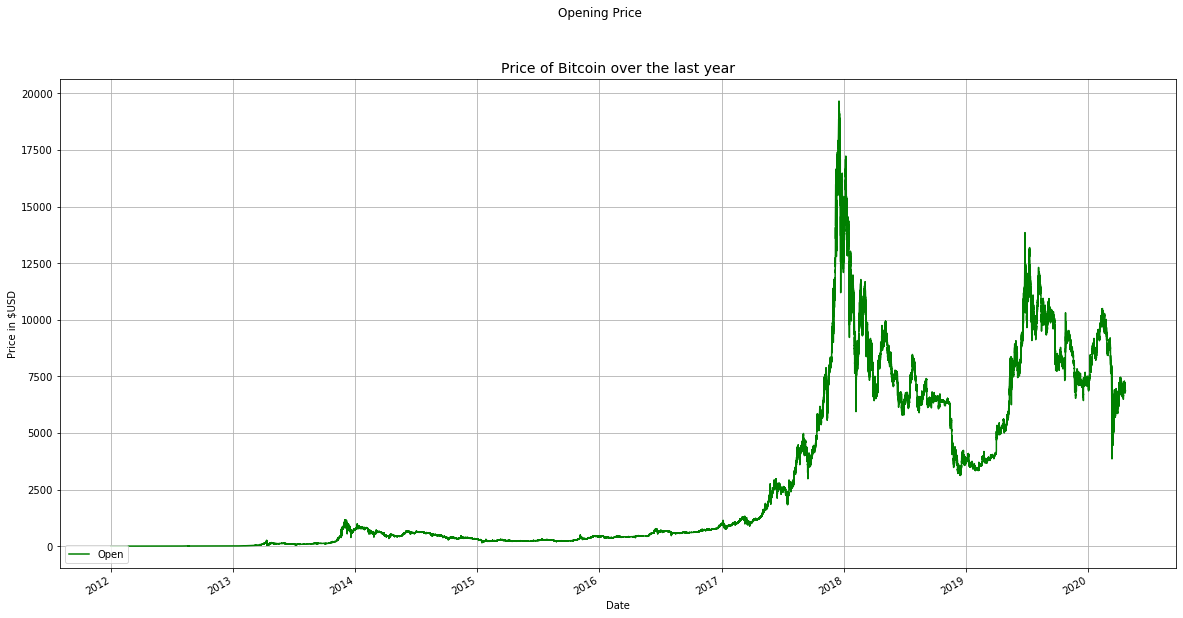

In [18]:
# Line Plot usage
bitcoin_EDA.plot(kind='line', x = 'Timestamp', y = 'Open' ,color='g',legend = True, label='Open', figsize=(20, 10),grid= True)
plt.legend(loc='lower left')
plt.title('Price of Bitcoin over the last year',fontsize=14, y=1)
plt.suptitle('Opening Price')
plt.ylabel('Price in $USD')
plt.xlabel('Date')
plt.show()


## Close

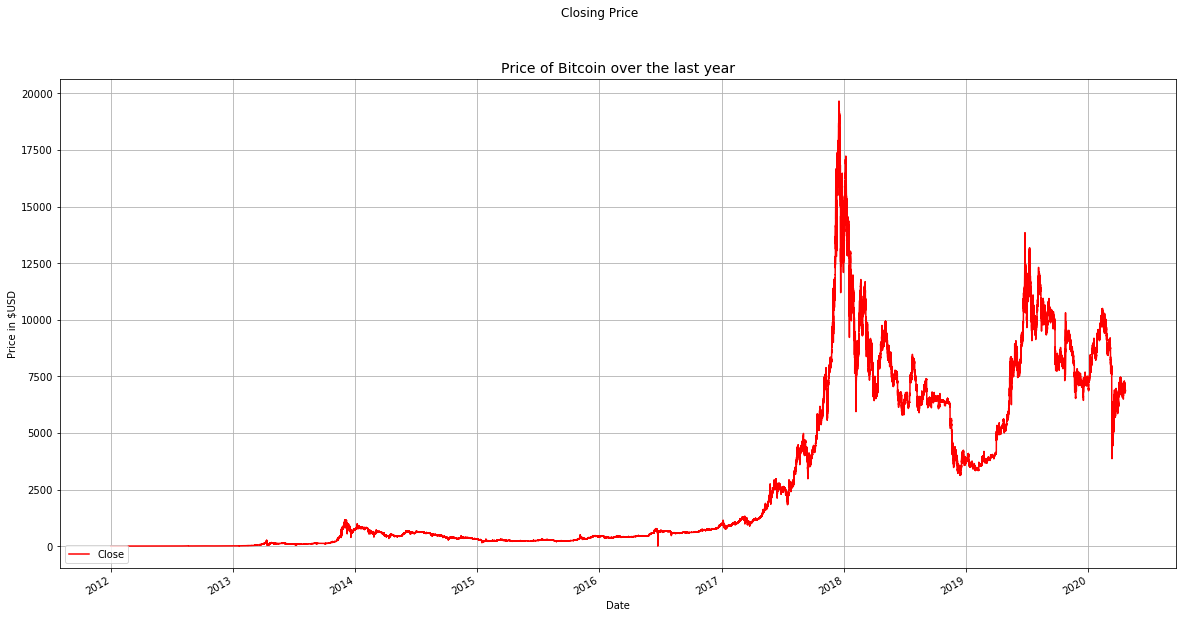

In [19]:
# Line Plot usage
bitcoin_EDA.plot(kind='line', x = 'Timestamp', y = 'Close' ,color='r',legend = True, label='Close', figsize=(20, 10),grid= True)
plt.legend(loc='lower left')
plt.title('Price of Bitcoin over the last year',fontsize=14, y=1)
plt.suptitle('Closing Price')
plt.ylabel('Price in $USD')
plt.xlabel('Date')
plt.show()

## High

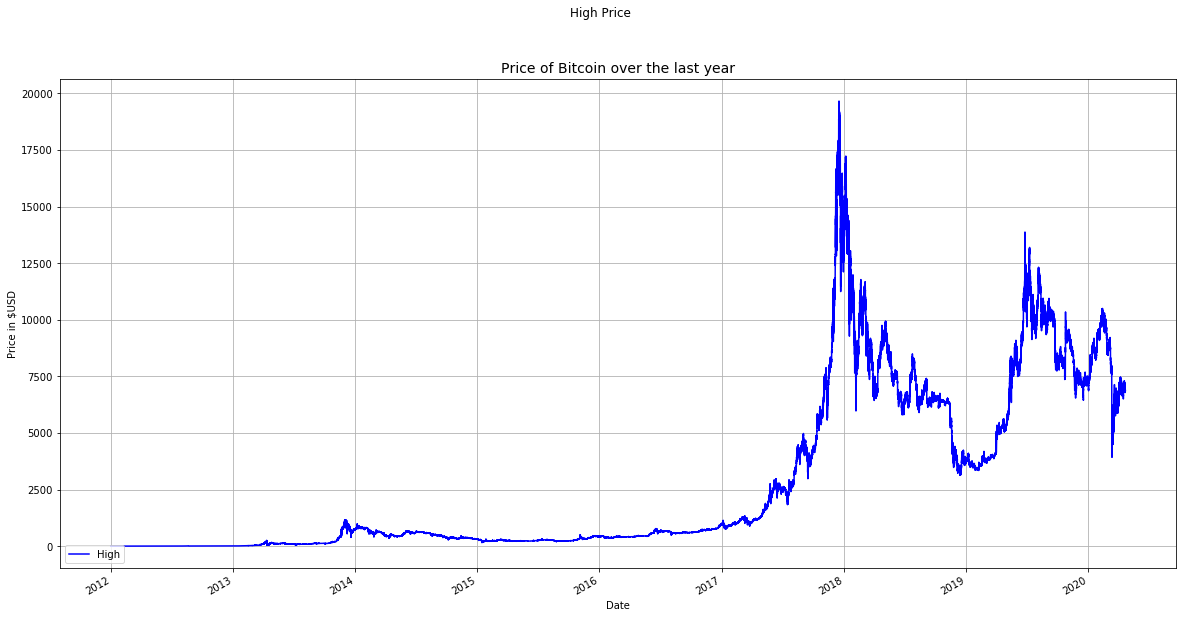

In [20]:
# Line Plot usage
bitcoin_EDA.plot(kind='line', x = 'Timestamp', y = 'High' ,color='b',legend = True, label='High', figsize=(20, 10),grid= True)
plt.legend(loc='lower left')
plt.title('Price of Bitcoin over the last year',fontsize=14, y=1)
plt.suptitle('High Price')
plt.ylabel('Price in $USD')
plt.xlabel('Date')
plt.show()

## Low

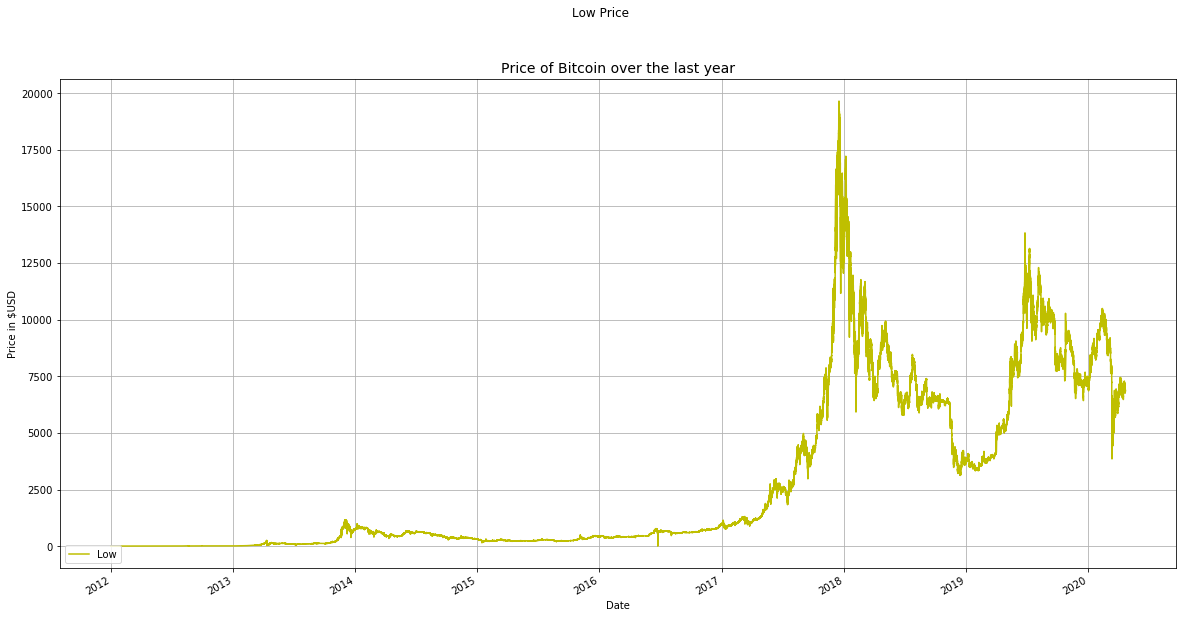

In [21]:
bitcoin_EDA.plot(kind='line', x = 'Timestamp', y = 'Low' ,color='y',legend = True, label='Low', figsize=(20, 10),grid= True)
plt.legend(loc='lower left')
plt.title('Price of Bitcoin over the last year',fontsize=14, y=1)
plt.suptitle('Low Price')
plt.ylabel('Price in $USD')
plt.xlabel('Date')
plt.show()

# Rollong mean


In [22]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [23]:
def test_stationarity(timeseries):
  # Determing rolling statistics
  
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 
    if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [24]:
bitcoin_EDA['Date_time'] = pd.to_datetime(bitcoin_EDA['Timestamp'])
# bitcoin_EDA.head()
bitcoin_EDA['Year'] = bitcoin_EDA['Date_time'].dt.year
bitcoin_EDA['Month'] = bitcoin_EDA['Date_time'].dt.month
bitcoin_EDA['Week'] = bitcoin_EDA['Date_time'].dt.week
bitcoin_EDA['Day'] = bitcoin_EDA['Date_time'].dt.day

bitcoin_EDA['Time_Decimal'] = bitcoin_EDA['Timestamp'].dt.hour + bitcoin_EDA['Timestamp'].dt.minute/60

day_Week={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bitcoin_EDA['Day_of_Week'] = bitcoin_EDA['Timestamp'].dt.dayofweek.map(day_Week)

In [25]:
bitcoin_EDA.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date_time,Year,Month,Week,Day,Time_Decimal,Day_of_Week
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,2011,12,52,31,7.866667,Sat
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,2011,12,52,31,15.833333,Sat
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,2011,12,52,31,16.983333,Sat
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,2011,12,52,31,17.000000,Sat
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,2012,1,52,1,4.266667,Sun


In [26]:
a = bitcoin_EDA.groupby(['Year','Month','Day'])
a

In [27]:
bitcoin_EDA_High_Low = a.agg({'High':'max', 'Low' : 'min', 'Weighted_Price' : 'mean' })
bitcoin_EDA_High_Low = bitcoin_EDA_High_Low.reset_index()
bitcoin_EDA_High_Low['Date'] = pd.to_datetime(bitcoin_EDA_High_Low.Year.astype(str) + bitcoin_EDA_High_Low.Month.astype(str), format='%Y%m')
bitcoin_EDA_High_Low.head()

,Year,Month,Day,High,Low,Weighted_Price,Date
0,2011,12,31,4.58,4.39,4.471603,2011-12-01
1,2012,1,1,5.00,4.58,4.806667,2012-01-01
2,2012,1,2,5.00,5.00,5.000000,2012-01-01
3,2012,1,3,5.32,5.14,5.252500,2012-01-01
4,2012,1,4,5.57,4.93,5.208159,2012-01-01


In [28]:
time_series = bitcoin_EDA_High_Low[['Date','Weighted_Price']]
time_series = time_series.set_index('Date')
time_series.head()

,Weighted_Price
Date,
2011-12-01,4.471603
2012-01-01,4.806667
2012-01-01,5.000000
2012-01-01,5.252500
2012-01-01,5.208159


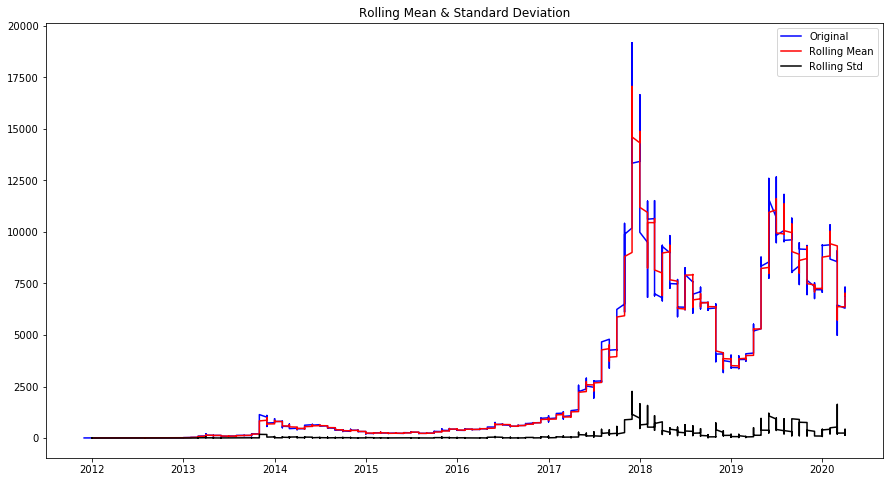

Results of Dickey-Fuller Test:
Test Statistic                   -1.640764
p-value                           0.461862
#Lags Used                       29.000000
Number of Observations Used    3003.000000
Critical Value (1%)              -3.432529
Critical Value (5%)              -2.862503
Critical Value (10%)             -2.567283
dtype: float64
Failed to Reject Ho - Time Series is Non-Stationary


In [29]:
test_stationarity(time_series)

# High price by DAY

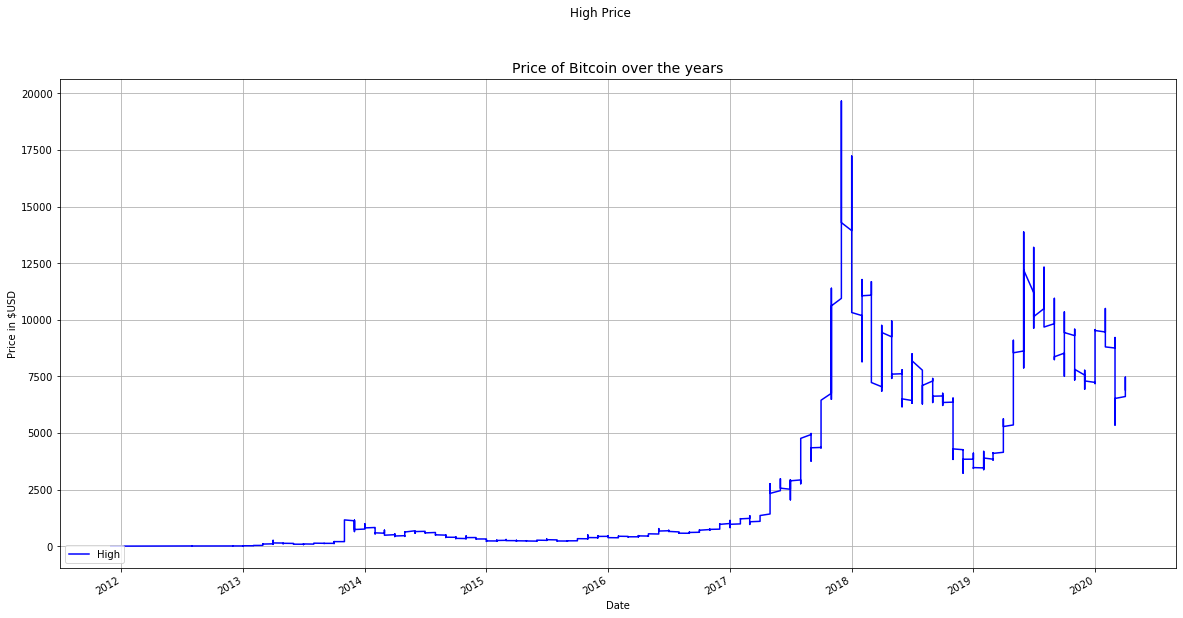

In [30]:
# Line Plot usage
bitcoin_EDA_High_Low.plot(kind='line', x = 'Date', y = 'High' ,color='b',legend = True, label='High', figsize=(20, 10),grid= True)
plt.legend(loc='lower left')
plt.title('Price of Bitcoin over the years',fontsize=14, y=1)
plt.suptitle('High Price')
plt.ylabel('Price in $USD')
plt.xlabel('Date')
plt.show()

# SARIMA 

In [31]:
from scipy import stats
import statsmodels.api as sm
from itertools import product
import warnings
from datetime import date, datetime

In [32]:
df = bitcoin_EDA

df.index = df.Timestamp
# Resampling to daily frequency
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

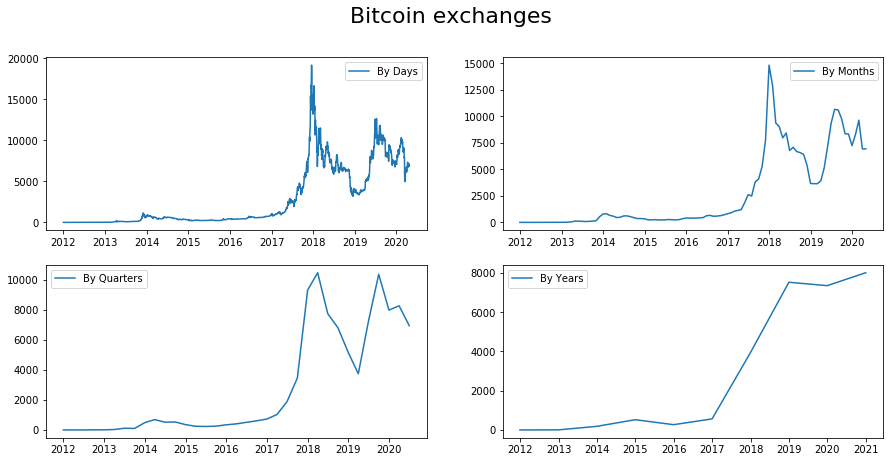

In [33]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

In [34]:
t1 = df_month[['Weighted_Price']]
t1.head()

,Weighted_Price
Timestamp,
2011-12-31,4.471603
2012-01-31,6.208550
2012-02-29,5.252527
2012-03-31,4.962132
2012-04-30,4.977368


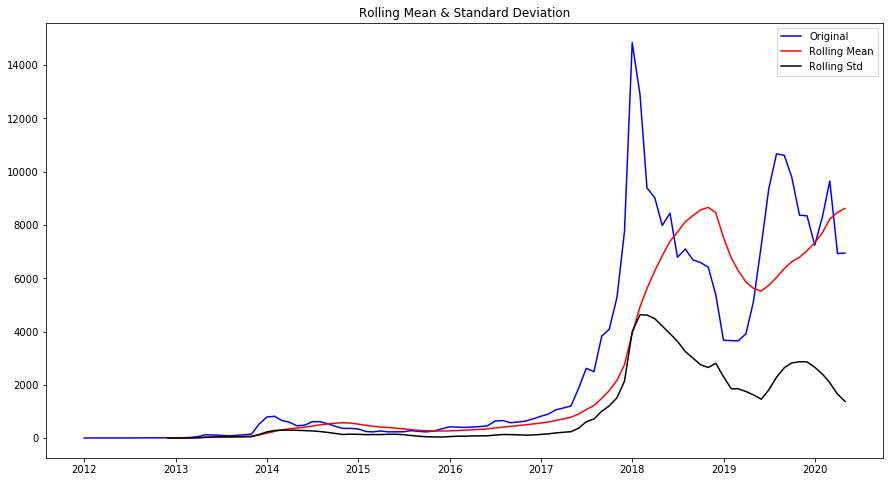

Results of Dickey-Fuller Test:
Test Statistic                 -1.722854
p-value                         0.419378
#Lags Used                      1.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64
Failed to Reject Ho - Time Series is Non-Stationary


In [35]:
test_stationarity(t1)

Dickey–Fuller test: p=0.419378


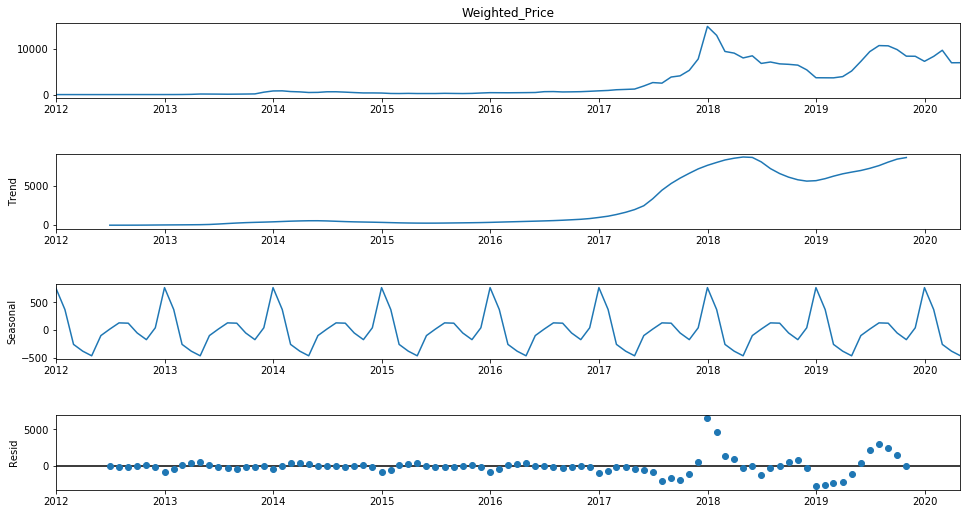

In [36]:
# plt.figure(figsize=(20,10))
fig = sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
fig.set_size_inches(15,8)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
plt.show()

/Users/harnooroberai/opt/anaconda3/envs/MScProject/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


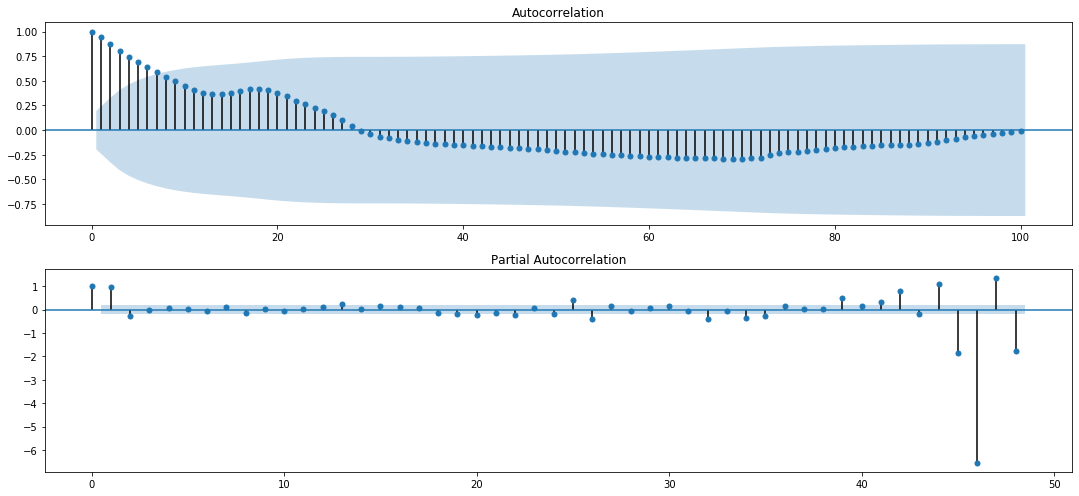

In [37]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.Weighted_Price.values.squeeze(), lags=100, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.Weighted_Price.values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [38]:
# Box-Cox Transformations
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

Dickey–Fuller test: p=0.419378


In [39]:
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.409699


Dickey–Fuller test: p=0.000003


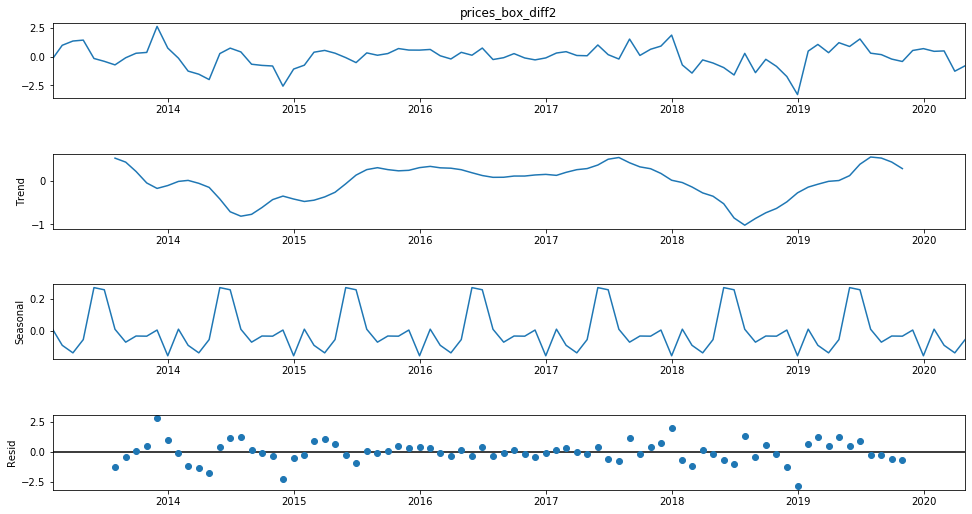

In [40]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
# plt.figure(figsize=(15,7))


# STL-decomposition
fig = sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
fig.set_size_inches(15,8)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

plt.show()

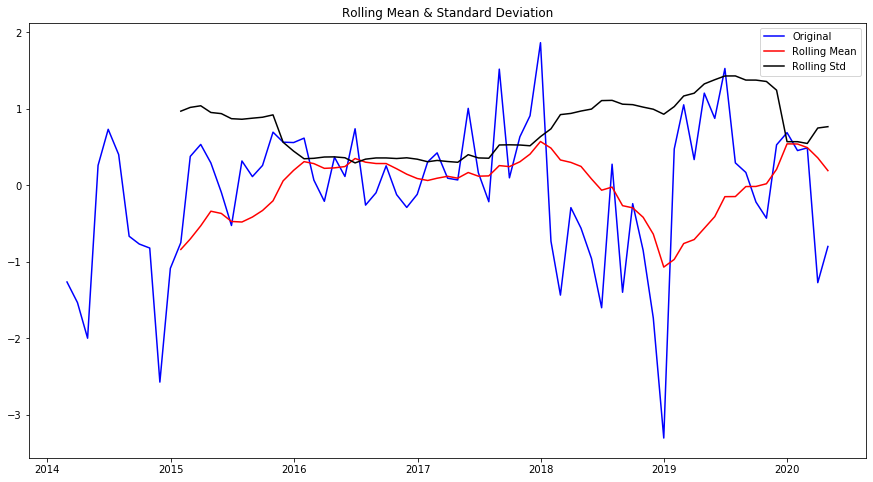

Results of Dickey-Fuller Test:
Test Statistic                 -4.636599
p-value                         0.000111
#Lags Used                     11.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64
Reject Ho - Time Series is Stationary


In [41]:
t2 = df_month.prices_box_diff2[13:]
t2 = t2.to_frame()
t2.head()


test_stationarity(t2[13:])

/Users/harnooroberai/opt/anaconda3/envs/MScProject/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


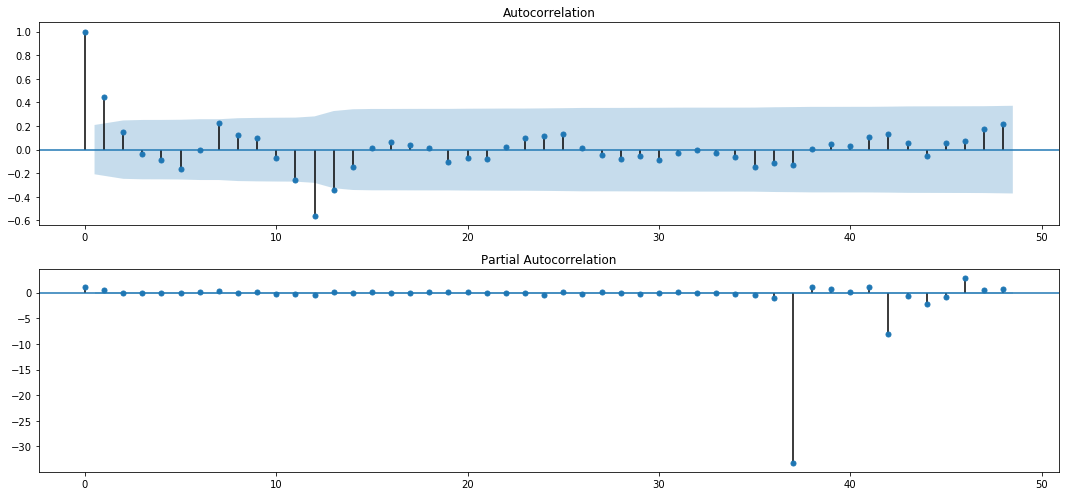

In [42]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

# Number of parameters = 81

In [43]:
Qs = range(0, 3)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D= range(1)
d= range(1)
parameters = product(ps, qs, Ps, Qs, d, D)
parameters_list = list(parameters)
len(parameters_list)
# type(ps)


# (1, 0, 0, 2, 1, 1)  175.917083

81

## SARIMA model 

In [49]:
Qs = range(0, 3)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D= range(1,3)
d= range(1,3)
parameters = product(ps, qs, Ps, Qs, d, D)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], param[4], param[1]), 
                                        seasonal_order=(param[2], param[5], param[3], 12)).fit(disp=-1)
#         model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(1, 1, 0), 
#                                         seasonal_order=(0, 1, 2, 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [50]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

             parameters         aic
0    (0, 0, 0, 0, 1, 1)  175.917083
220  (2, 0, 0, 1, 1, 1)  175.917083
219  (2, 0, 0, 0, 2, 2)  175.917083
218  (2, 0, 0, 0, 2, 1)  175.917083
217  (2, 0, 0, 0, 1, 2)  175.917083
                                        SARIMAX Results                                        
Dep. Variable:                      Weighted_Price_box   No. Observations:                  101
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                 -83.959
Date:                                 Tue, 01 Sep 2020   AIC                            175.917
Time:                                         09:02:36   BIC                            185.826
Sample:                                     12-31-2011   HQIC                           179.909
                                          - 04-30-2020                                         
Covariance Type:                                   opg                                         
                

In [51]:
tmp = result_table.sort_values(by = 'aic', ascending=True)
tmp.head()
tmp = tmp.reset_index()
tmp = tmp.drop(['index'], axis=1)
tmp.head(10)

,parameters,aic
0,"(0, 0, 0, 0, 1, 1)",175.917083
1,"(2, 0, 0, 1, 1, 1)",175.917083
2,"(2, 0, 0, 0, 2, 2)",175.917083
3,"(2, 0, 0, 0, 2, 1)",175.917083
4,"(2, 0, 0, 0, 1, 2)",175.917083
5,"(2, 0, 0, 0, 1, 1)",175.917083
6,"(1, 2, 2, 2, 2, 2)",175.917083
7,"(1, 2, 2, 2, 2, 1)",175.917083
8,"(2, 0, 0, 1, 1, 2)",175.917083
9,"(1, 2, 2, 2, 1, 2)",175.917083


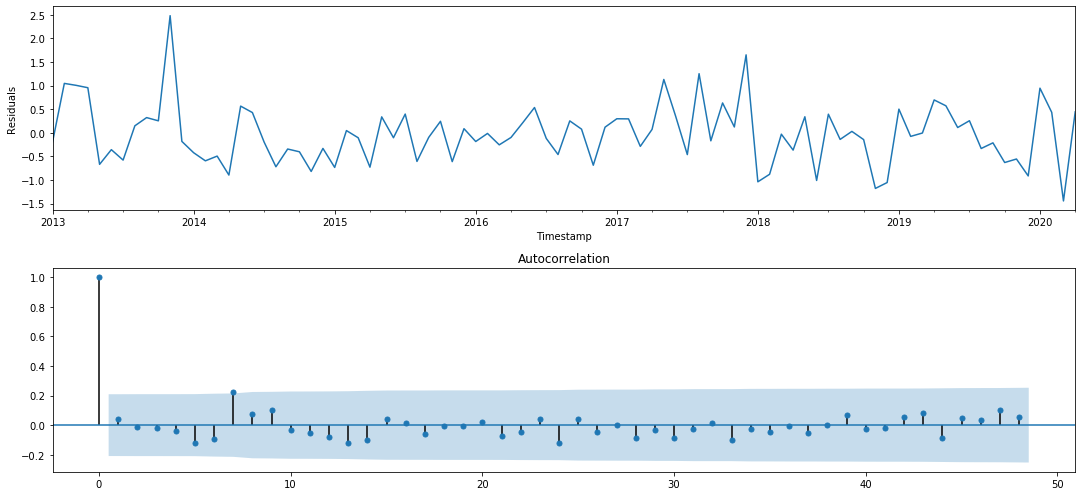

In [52]:
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

# print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

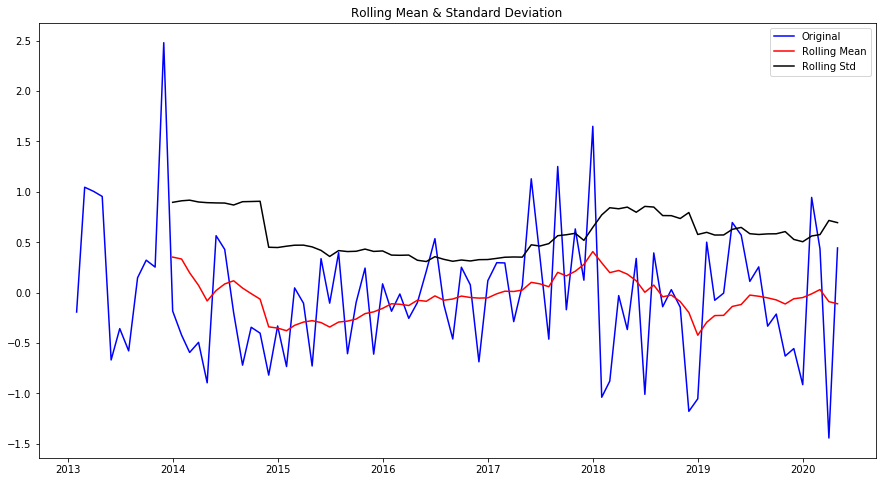

Results of Dickey-Fuller Test:
Test Statistic                -8.787435e+00
p-value                        2.288365e-14
#Lags Used                     0.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64
Reject Ho - Time Series is Stationary


In [53]:
df_best_model = best_model.resid[13:]
df_best_model = df_best_model.to_frame()
test_stationarity(df_best_model)

In [54]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [55]:
df_month2 = df_month[['Weighted_Price']]
df_month2.head()

,Weighted_Price
Timestamp,
2011-12-31,4.471603
2012-01-31,6.208550
2012-02-29,5.252527
2012-03-31,4.962132
2012-04-30,4.977368


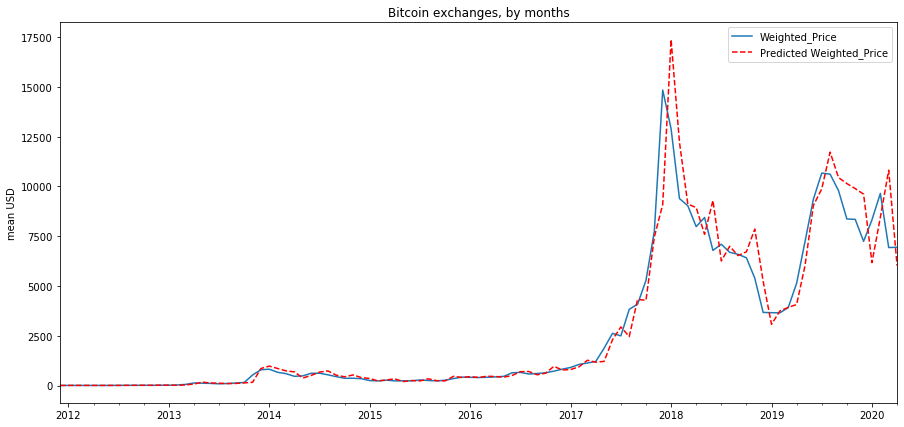

In [56]:
df_month2 = df_month[['Weighted_Price']]
future = pd.DataFrame(columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=100), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [57]:
df_month2[['Weighted_Price','forecast']].tail(15)

,Weighted_Price,forecast
2019-02-28,3648.527128,3744.921123
2019-03-31,3918.429353,3924.186665
2019-04-30,5137.582914,4068.311792
2019-05-31,7224.408577,6018.008290
2019-06-30,9355.098647,9039.809064
2019-07-31,10668.034536,9874.721538
2019-08-31,10614.394673,11721.678903
2019-09-30,9793.375249,10443.625370
2019-10-31,8366.291324,10142.967140
2019-11-30,8342.739513,9889.874422


# Out-of-time Cross Validation 

In [79]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    return({'mape':mape, 'Accuracy':(1-round(mape,2))*100})



In [80]:
acc =[]
for i in range(86,101):
    train = df_month2.Weighted_Price[:i]
    test = df_month2.Weighted_Price[i:]
    trainModel = model=sm.tsa.statespace.SARIMAX(train, order=(1, 1, 0), 
                                        seasonal_order=(0, 1, 2, 12)).fit(disp=-1)
    fcast = trainModel.get_forecast(test.shape[0], alpha =0.5)
    fc = fcast.predicted_mean
    lower_series = fcast.conf_int()['lower Weighted_Price']
    upper_series = fcast.conf_int()['upper Weighted_Price']
    forecastResult = fc.to_frame()
    forecastResult['test'] = test
    forecastResult['error'] = (np.abs(fc - test)/np.abs(test))
    forecastResult = forecastResult.rename(columns = {0:'train'})
    res = forecast_accuracy(fc, test)
    acc.append(res['Accuracy'])
    print("train:",train.shape[0],"test:",test.shape[0], res)    

acc

train: 86 test: 15 {'mape': 0.2683689878946185, 'Accuracy': 73.0}
train: 87 test: 14 {'mape': 0.2997295743613884, 'Accuracy': 70.0}
train: 88 test: 13 {'mape': 0.3042525141381508, 'Accuracy': 70.0}
train: 89 test: 12 {'mape': 0.27782817843709323, 'Accuracy': 72.0}
train: 90 test: 11 {'mape': 0.3568239856407437, 'Accuracy': 64.0}
train: 91 test: 10 {'mape': 0.4956811802189856, 'Accuracy': 50.0}
train: 92 test: 9 {'mape': 0.6932558367496333, 'Accuracy': 31.000000000000007}
train: 93 test: 8 {'mape': 0.6052282590468643, 'Accuracy': 39.0}
train: 94 test: 7 {'mape': 0.5485163128971591, 'Accuracy': 44.99999999999999}
train: 95 test: 6 {'mape': 0.2885520059921562, 'Accuracy': 71.0}
train: 96 test: 5 {'mape': 0.24838113676647477, 'Accuracy': 75.0}
train: 97 test: 4 {'mape': 0.23247108961488552, 'Accuracy': 77.0}
train: 98 test: 3 {'mape': 0.16713446977216898, 'Accuracy': 83.0}
train: 99 test: 2 {'mape': 0.41730001609650047, 'Accuracy': 58.00000000000001}
train: 100 test: 1 {'mape': 0.128548104

[73.0,
 70.0,
 70.0,
 72.0,
 64.0,
 50.0,
 31.000000000000007,
 39.0,
 44.99999999999999,
 71.0,
 75.0,
 77.0,
 83.0,
 58.00000000000001,
 87.0]

## Avergae accuracy with mulitple ratios of train : test  => 64.3%

In [81]:
import statistics
statistics.mean(acc)

64.33333333333333

## Avergae accuracy for last 5 months : 76%

In [95]:
statistics.mean(acc[-5:])

76.0

## Last 15 price predicitions with accuracy = 73 %

In [82]:
train = df_month2.Weighted_Price[:86]
test = df_month2.Weighted_Price[86:]

In [83]:
trainModel = sm.tsa.statespace.SARIMAX(train, order=(1, 1, 0), 
                                        seasonal_order=(0, 1, 2, 12)).fit(disp=-1)

In [84]:
trainModel.forecast(15,alpha =0.05)

2019-02-28     4039.911882
2019-03-31     4111.522662
2019-04-30     4235.827787
2019-05-31     4469.161205
2019-06-30     5049.077396
2019-07-31     4992.079557
2019-08-31     5508.500634
2019-09-30     5617.482254
2019-10-31     6132.066399
2019-11-30     7273.819483
2019-12-31    10334.258199
2020-01-31     9595.794042
2020-02-29     8248.323424
2020-03-31     8142.446184
2020-04-30     7753.980644
Freq: M, dtype: float64

In [85]:
train.tail()

2018-09-30    6589.364047
2018-10-31    6415.289474
2018-11-30    5388.115814
2018-12-31    3670.993747
2019-01-31    3658.591625
Name: Weighted_Price, dtype: float64

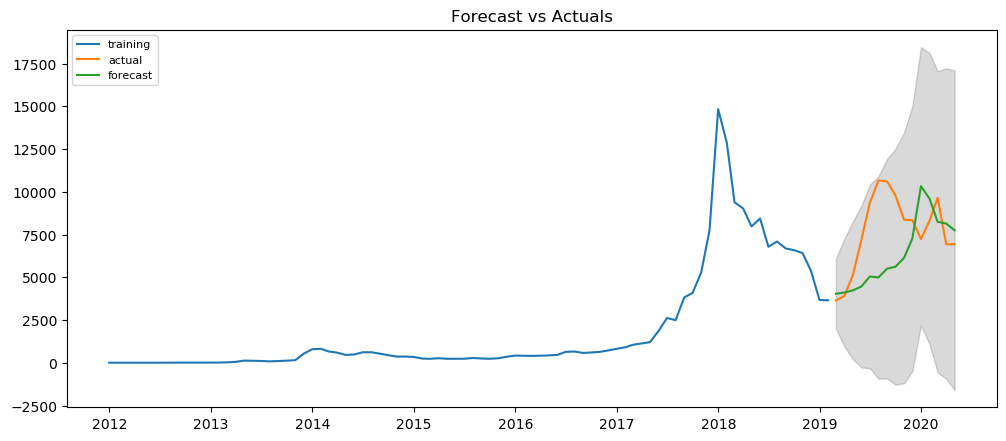

In [86]:
fcast = trainModel.get_forecast(15, alpha =0.5)
fc = fcast.predicted_mean
lower_series = fcast.conf_int()['lower Weighted_Price']
upper_series = fcast.conf_int()['upper Weighted_Price']

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()



In [87]:
forecastResult = fc.to_frame()
forecastResult['test'] = test
forecastResult['error'] = (np.abs(fc - test)/np.abs(test))
forecastResult = forecastResult.rename(columns = {0:'train'})
forecastResult

,train,test,error
2019-02-28,4039.911882,3648.527128,0.107272
2019-03-31,4111.522662,3918.429353,0.049278
2019-04-30,4235.827787,5137.582914,0.175521
2019-05-31,4469.161205,7224.408577,0.381380
2019-06-30,5049.077396,9355.098647,0.460286
2019-07-31,4992.079557,10668.034536,0.532053
2019-08-31,5508.500634,10614.394673,0.481035
2019-09-30,5617.482254,9793.375249,0.426400
2019-10-31,6132.066399,8366.291324,0.267051
2019-11-30,7273.819483,8342.739513,0.128126


In [88]:
res = forecast_accuracy(fc, test)
res

{'mape': 0.2683689878946185, 'Accuracy': 73.0}